# Movie Data Analysis

### Overview

<img src="microsoft.jpeg" width="600" height="600" align="center"/>

This project analyzes film data with respect to the genres, budgets and release dates. The data is primarily sourced from two formats, one a CSV and the other a database. Analysis of the data will demonstrate that certain genres rate higher than others, that there is a reasonable production budget and that certain months are more ideal for a film premier. Microsoft can use these insights to select genres, plan their budgets and set release dates for their films.

### Business Problem

<img src="cinema.jpeg" width="600" height="600" align="center"/>

A stakeholder needs data driven recommendations for Microsoft's new movie studio. Microsoft does not have industry experience in financing, producing or releasing films and therefore needs direction. Three recommendations formulated from film-based data are proposed to address these issues so Microsoft can confidently navigate the film industry.

### Data Understanding

<img src="film_data.png" width="600" height="600" align="center"/>

A film database is used for analysis, in particular two tables with a common field, movie_id, which includes other fields such as averagerating and genres. A CSV file is also used for analysis and includes fields such as release_date, production_budget and worldwide_gross.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [2]:
# Rotten Tomatoes Movie Info
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")

# Identify quantity of NaN values (if any) for box_office in rt_movie_info
rt_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

There are too many NaN values (1220 out of 1560) in box_office for this data 
to be used to calculate box office by genre.

In [3]:
conn = sqlite3.connect("im.db")

In [4]:
# Join movie_basics and movie_ratings using the key 'movie_id'
q = """
SELECT *
  FROM movie_basics
  JOIN movie_ratings
 USING (movie_id);
"""
movie_b_and_r = pd.read_sql(q, conn)

# Feature engineering
# Creating a new column with each row having a list of their respective genres 
# in that column and exploding the newly created column to analyze the genres

movie_b_and_r['single_genres'] = movie_b_and_r.genres.str.split(',')
movie_b_and_r = movie_b_and_r.explode('single_genres')

# Grouping the data by the new column and slicing on 'averagerating' and calculating
# the mean and sorting the values

genre_by_rating = movie_b_and_r.groupby('single_genres')['averagerating'].mean().sort_values(ascending=False)

# Close connection to database
conn.close()

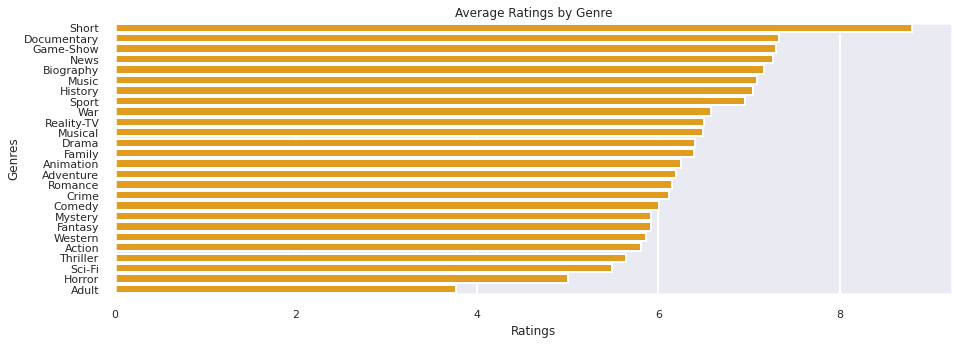

In [5]:
# Graphing the groupby variable and styling with Seaborn
sns.set_style('darkgrid')
sns.set_context('poster',font_scale = .50)
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=genre_by_rating.values, y=genre_by_rating.index, color='orange')
ax.set_ylabel('Genres')
ax.set_xlabel('Ratings')
plt.title("Average Ratings by Genre");

### Analysis

As can be seen above, the genres with the highest ratings are short films, documentaries, game-shows, news, biography, music, history and sport, before noticeably decreasing in average rating. Although Microsoft cannot control the consumer's response to a film, Microsoft can focus their efforts on genres which are more receptive compared to other genres. Strategically, Microsoft should first focus on making short films, which are likelier to have favorable ratings, to establish credibility. Microsoft should then produce films such as documentaries and biographies to maintain high ratings.

Financially speaking, the aforementioned films are relatively less costly to produce than block-buster films and therefore less risky. Subsequently, if these films prove successful, it is only then that Microsoft should produce a blockbuster film, such as a history-based film. By then, Microsoft will have garnered high ratings and earned the loyalty of their audiences so their box office earnings should prove promising.


**This rating metric should be considered in light of not having data available on box office by genre which requires further analysis**

### Recommendation
*Based on this analysis, Microsoft's first film should be a short film, followed by a documentary and then a history-based blockbuster film, all of which are likely to rate favorably, thereby establishing Microsoft's credibility and earning them viewers which leads to consumer loyalty translating to recurring revenue.*

In [6]:
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# movie_budgets info
# The goal is to find the median production_budget to create a graph of the 
# production_budget and recommend the median production_budget to Microsoft
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
# Strip the dollar sign and replace the commas from 
# field production_budget to analyze central tendency
movie_budgets.production_budget = movie_budgets.production_budget.apply(lambda x: x.strip('$').replace(',', ''))
movie_budgets.production_budget

# Change the field from an 'object' into 'int64'
movie_budgets.production_budget = movie_budgets.production_budget.astype('int64')
movie_budgets.production_budget.dtype

# Do the same for field worldwide_gross 
# Strip the dollar sign and replace the commas 
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.apply(lambda x: x.strip('$').replace(',', ''))

# Change the field from an 'object' into 'int64'
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.astype('int64')

In [9]:
# Statisical analysis using describe() method 
movie_budgets.production_budget.describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [10]:
# Seen above, the min is only 1100 while the max is 425000000
# This is a large range and so some outliers are expected

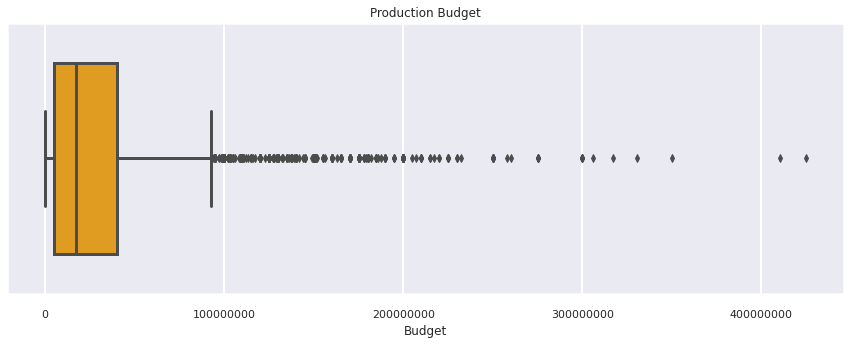

In [11]:
# Remove outliers from production_budget
# using a Seaborn box plot to visualize and identify the outliers
sns.set_style('darkgrid')
sns.set_context('poster',font_scale = .50)

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=movie_budgets.production_budget, width=.7, color='orange')

ax.set_xlabel('Budget')
plt.title("Production Budget")
ax.ticklabel_format(style='plain', axis='x');

In [12]:
# Measures of central tendency for field 
# production_budget to recommend starting production budget
production_budgets_median = movie_budgets.production_budget.median()
production_budgets_median

17000000.0

The current median production budget is 17 million dollars.

Given the extremely large production budgets in this data and their effect on the production budget median, this analysis will focus on films below a 70 million dollar production budget. This allows Microsoft to produce films with a relatively smaller production budget early in its inception before becoming an established movie studio.

In [13]:
# Removing production_budget values over the 70 million upper limit
upper_limit = 70000000
new_movie_budgets = movie_budgets[movie_budgets.production_budget<upper_limit]
new_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
749,50,"Jul 9, 2010",Despicable Me,69000000,"$251,513,985",543464573
750,51,"Jul 30, 2010",Dinner for Schmucks,69000000,"$73,026,337",86796502
751,52,"Mar 2, 2018",Red Sparrow,69000000,"$46,874,505",145951861
752,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,"$300,531,751",706102828
753,54,"May 31, 2002",The Sum of All Fears,68000000,"$118,471,320",193500000
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0


In [14]:
# By filtering out values greater than the upper limit of 
# 70 million, the rows decreased from 5782 to 5033; 749 values removed

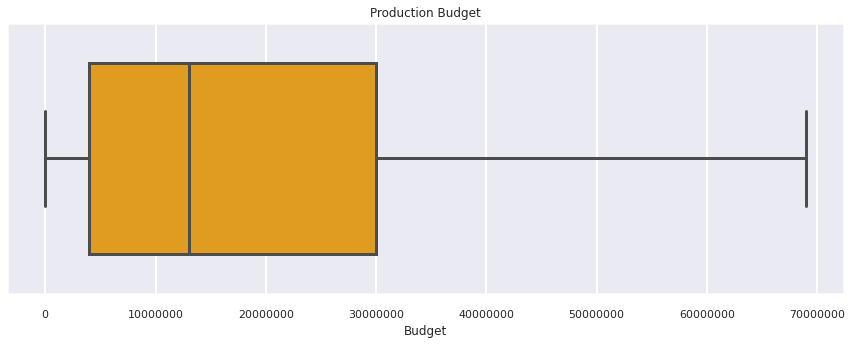

In [15]:
# Recreating the box plot of production_budget without outliers
sns.set_style('darkgrid')
sns.set_context('poster',font_scale = .50)

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=new_movie_budgets.production_budget, width=.7, color='orange')

ax.set_xlabel('Budget')
plt.title("Production Budget")
ax.ticklabel_format(style='plain', axis='x');

In [16]:
# Recalculating the production budget median
new_production_budgets_median = new_movie_budgets.production_budget.median()
new_production_budgets_median

13000000.0

### Analysis
No outliers in the graph above demonstrating that they are not factored into the new median. This boxplot shows the production budget median at 13 million and the 25th percentile at 400,000 and the 75th percentile at 30 million.

### Recommendation
*According to the median of these film production budgets, Microsoft needs to anticipate a production budget of 13 million USD per film.*

Feature engineering

Creating a new column for calculating the ROI to identify which ROI percentage Microsoft should anticipate. Followed by calculating the median ROI by month to identify which months yield the highest ROI and make a recommendation to Microsoft for the months they should release their films. Calculating ROI will use worldwide_gross because after all, Microsoft is a global company.

In [17]:
# Creating a new field called ROI
movie_budgets['ROI'] = ((movie_budgets.worldwide_gross - movie_budgets.production_budget)/(movie_budgets.production_budget))*100

# ROI median with outliers
roi_median = movie_budgets.ROI.median()
roi_median

70.83098257683216

In [18]:
# The current ROI calculated with outliers is 70.83 percent. 

In [19]:
# Previewing the top 20 highest ROI films within this data
highest_roi = movie_budgets.sort_values(by='ROI', ascending=False)
highest_roi[:20]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
5745,46,"Jun 30, 1972",Deep Throat,25000,"$45,000,000",45000000,179900.000000
5613,14,"Mar 21, 1980",Mad Max,200000,"$8,750,000",99750000,49775.000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,"$107,918,810",194183034,43051.785333
5679,80,"Jul 10, 2015",The Gallows,100000,"$22,764,410",41656474,41556.474000
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,"$140,539,099",248300000,41283.333333
5709,10,"May 7, 2004",Super Size Me,65000,"$11,529,368",22233808,34105.858462
5346,47,"Aug 13, 1942",Bambi,858000,"$102,797,000",268000000,31135.431235
5773,74,"Feb 26, 1993",El Mariachi,7000,"$2,040,920",2041928,29070.400000
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,"$12,087,064",30087064,26292.161404
5210,11,"Nov 21, 1976",Rocky,1000000,"$117,235,147",225000000,22400.000000


Taking a look at the top 20 ROI films above, films with relatively small production budgets that are incredibly successful consequently have astronomically high ROI compared to a typical film in this dataset. Films such as the ones shown in the table above are, according to an [article](https://screenrant.com/most-profitable-movies-ever/) from ScreenRant, successful because the film was either a cultural phenomenon, or the film went viral, or even still the film was genuine and therefore captivated audiences. Films such as these are the exception and not the rule and therefore need to be excluded from the median. 

In [20]:
# Creating a copy of movie_budgets df 
movie_budgets_copy = movie_budgets.copy()

In [21]:
# Filtering out the outliers from the ROI field using IQR
Q1 = np.percentile(movie_budgets['ROI'], 25, interpolation='midpoint')

Q3 = np.percentile(movie_budgets['ROI'], 75, interpolation='midpoint')

IQR = Q3 - Q1

# define upper and lower bounds
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR

# set bounds
upper = np.where(movie_budgets['ROI'] >= upper_bound)
lower = np.where(movie_budgets['ROI'] <= lower_bound)

# removing outliers
movie_budgets_copy.drop(upper[0], inplace=True)
movie_budgets_copy.drop(lower[0], inplace=True)

In [22]:
movie_budgets_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,315.369636
...,...,...,...,...,...,...,...
5772,73,"Jan 13, 2012",Newlyweds,9000,"$4,584",4584,-49.066667
5776,77,"Dec 31, 2004",The Mongol King,7000,$900,900,-87.142857
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,-100.000000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,-73.240000


In [23]:
# By filtering out rows with ROI outliers, the rows
# decreased from 5782 to 5287; 495 rows removed

In [24]:
# Recalculating the median
new_roi_median = movie_budgets_copy.ROI.median()
new_roi_median

46.2528175

The median is no longer influenced the outliers. Therefore, Microsoft can expect an ROI of 46.25 percent.

In [25]:
# Feature engineering field month to identify which months have the highest ROI
# to make a recommendation to Microsoft of the months they should release their films
movie_budgets_copy['month'] = movie_budgets_copy.release_date.apply(lambda x: x[:3])

# group by month, slice on ROI and sort descending
roi_by_month = movie_budgets_copy.groupby(['month'])['ROI'].median().sort_values(ascending=False)
roi_by_month

month
Jul    94.992793
Jun    89.993792
Nov    81.183108
May    72.112549
Aug    48.342985
Feb    40.293260
Dec    39.181830
Mar    37.398749
Apr    27.080192
Jan    24.263175
Oct    21.798247
Sep    15.390900
Name: ROI, dtype: float64

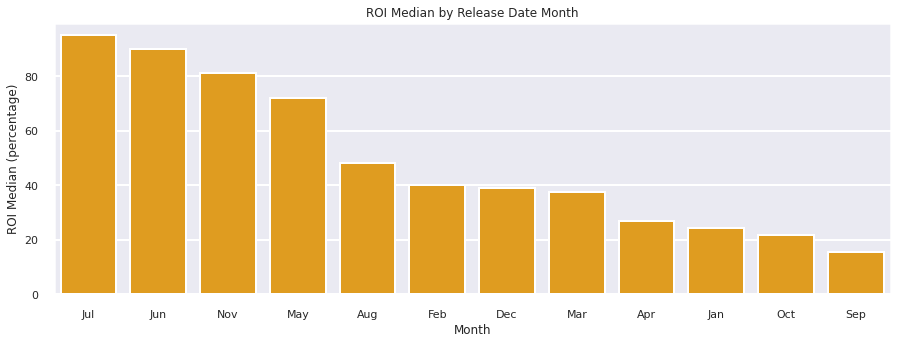

In [26]:
# Creating a bar chart demonstrating which months have the highest median ROI
# Graphing the groupby variable and styling with Seaborn
sns.set_style('darkgrid')
sns.set_context('poster',font_scale = .50)
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=roi_by_month.index, y=roi_by_month.values, color='orange')
ax.set_ylabel('ROI Median (percentage)')
ax.set_xlabel('Month')
plt.title("ROI Median by Release Date Month");

### Analysis

As can be seen above, the months with the highest ROI median are July, June, November and May. Therefore, Microsoft should release their films during these four months.
These findings align with typical consumer behavior since the summer months are usually when most consumers go out to spend their money because the weather is fair. Also, November is a month associated with peak Christmas shopping at malls and commercial centers, so there is an increased likelihood shoppers will look for rest from their shopping by stopping by the cinema to watch a film.

### Recommendation
*According to this analysis, Microsoft should release their films in July, June, November and May.*

### Conclusions

In summation, the three recommendations Microsoft should implement for their new movie studio are:
* The first few films should be low-budget short films or documentaries before producing a block-buster film
* The initial production budget should not greatly deviate from 13 million dollars
* The release dates of their films should be in July, June, November or May